In [9]:
%load_ext autoreload

In [11]:
%autoreload 2

# Attributed graphs in NetworkX

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns; sns.set_style('white')
import sys; sys.path.append('../')

In [17]:
from VRG.runner import get_graph
from VRG.src.utils import load_pickle

In [3]:
def plot_graph(g, ax=None, title='', attr_name='', mixing_dict={}):
    unique_values = set(mixing_dict.keys())
    colors = sns.color_palette('pastel', n_colors=len(unique_values))
    color_map = {val: col for val, col in zip(unique_values, colors)}

    try:
        colors = [color_map[d[attr_name]] for _, d in g.nodes(data=True)]
    except KeyError:
        colors = '#77dd77'
    pos = nx.spring_layout(g)

    if ax is not None:
        ax.set_title(title, fontsize=20)
    nx.draw_networkx_nodes(g, pos=pos, node_size=100, node_color=colors, alpha=0.7, ax=ax)
    nx.draw_networkx_edges(g, pos=pos, edge_color='gray', alpha=0.7, ax=ax)
    return

In [4]:
def grid_plot(graphs, graph_name='', attr_name='', mixing_dict={}):
    # todo keep the positions of the constant nodes fixed
    rows, cols = 2, 4
    plt.rcParams['figure.figsize'] = [30, 15]

    grid = gridspec.GridSpec(rows, cols)
    fig = plt.figure()
    for i, box in enumerate(grid):
        ax = fig.add_subplot(box)
        g = graphs[i]
        deg_as = round(nx.degree_assortativity_coefficient(g), 3)
        attr_as = round(nx.attribute_assortativity_coefficient(g, attribute=attr_name), 3)
        title = f'g{i + 1} {g.order(), g.size()} degree as: {deg_as} {attr_name} as: {attr_as}'
        plot_graph(g, ax=ax, title=title, mixing_dict=mixing_dict, attr_name=attr_name)

    plt.tight_layout()
    plt.suptitle(f'{graph_name}', y=1, fontsize=10)

In [19]:
name = 'karate'; attr_name = 'club'
orig_g = get_graph(name)

mixing_dict = nx.attribute_mixing_dict(orig_g, attr_name)

Graph: karate, n = 34, m = 78 read in 0s.


In [18]:
graphs = load_pickle(f'../VRG/dumps/graphs/karate/AVRG_leiden_5_10.pkl')

In [20]:
graphs_to_draw = [orig_g] + graphs[: 7]

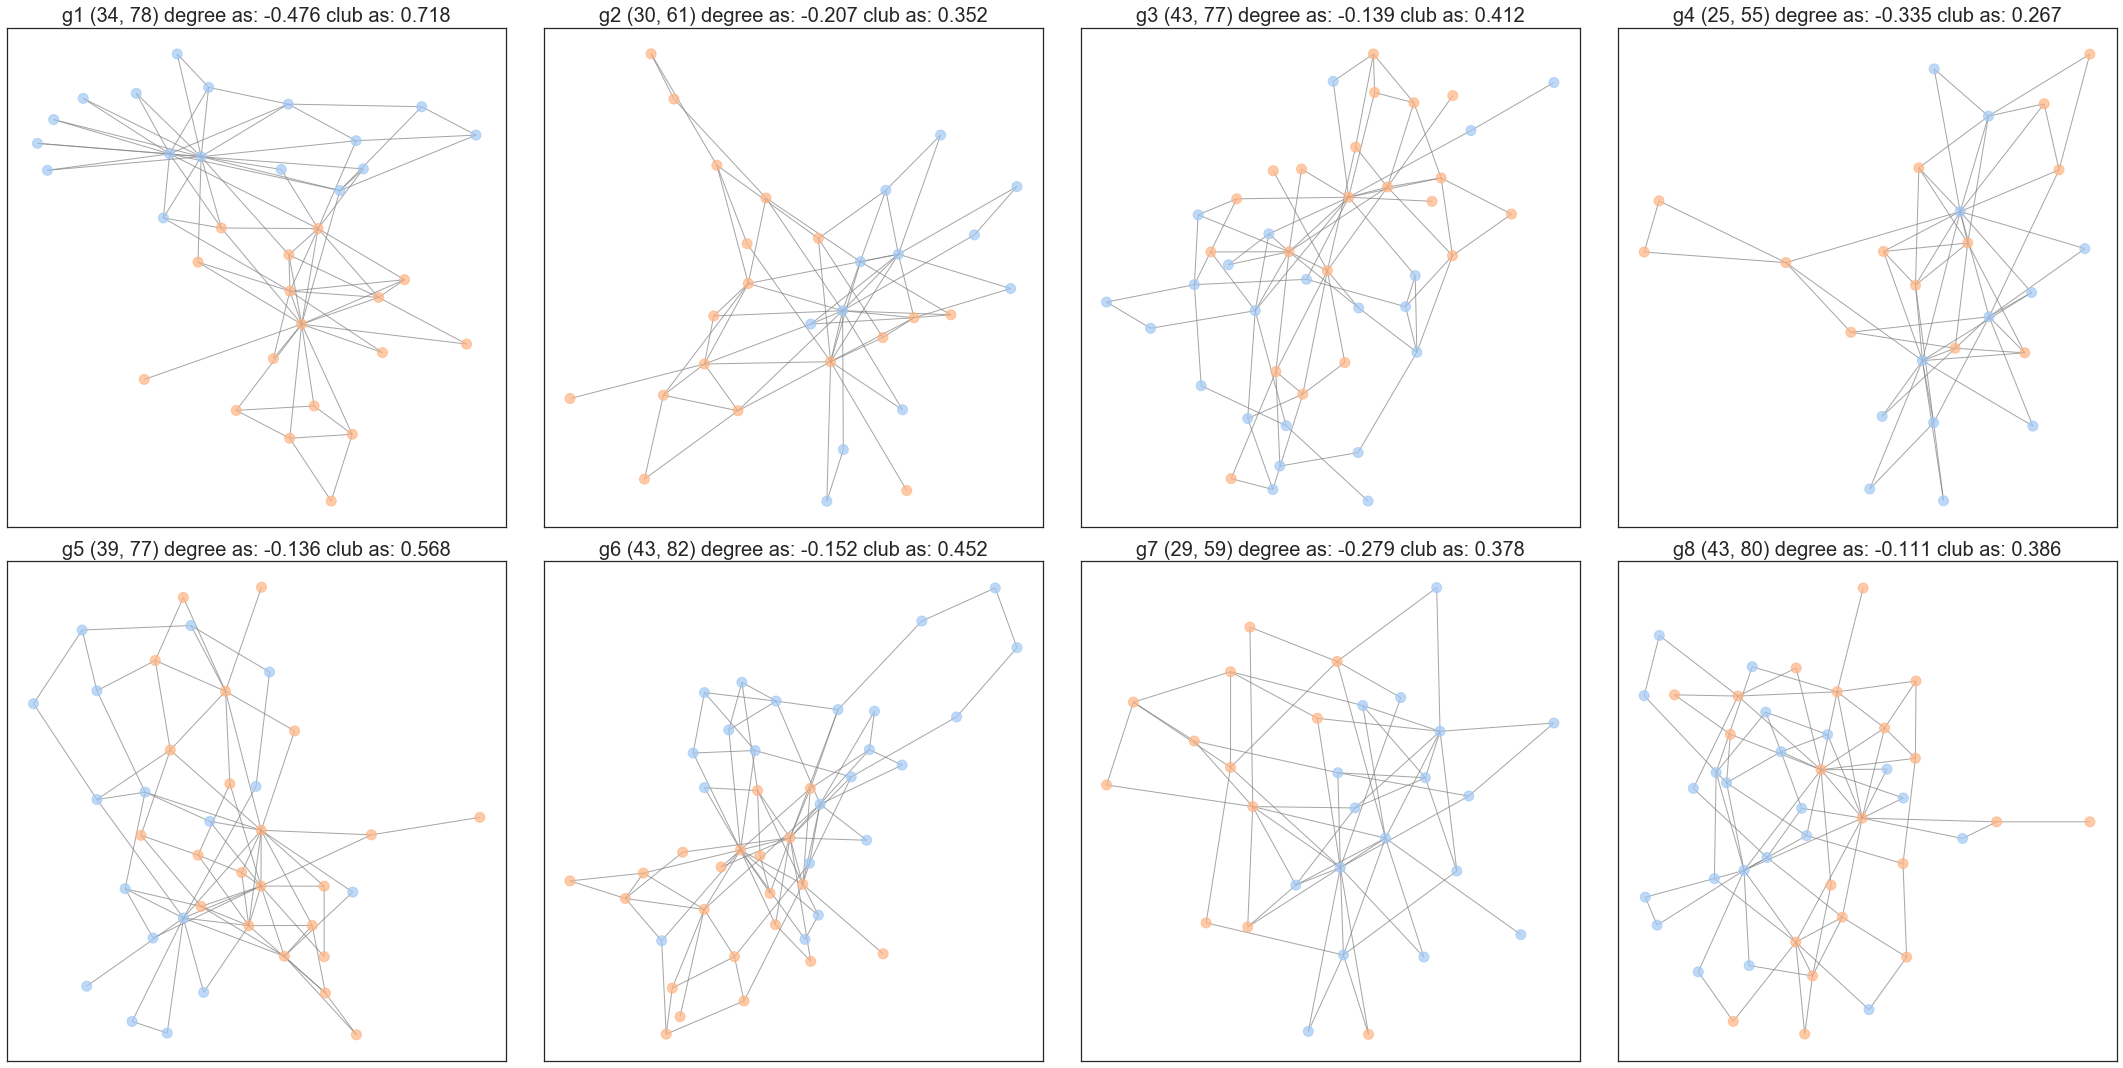

In [21]:
grid_plot(graphs_to_draw, attr_name=attr_name, mixing_dict=mixing_dict)